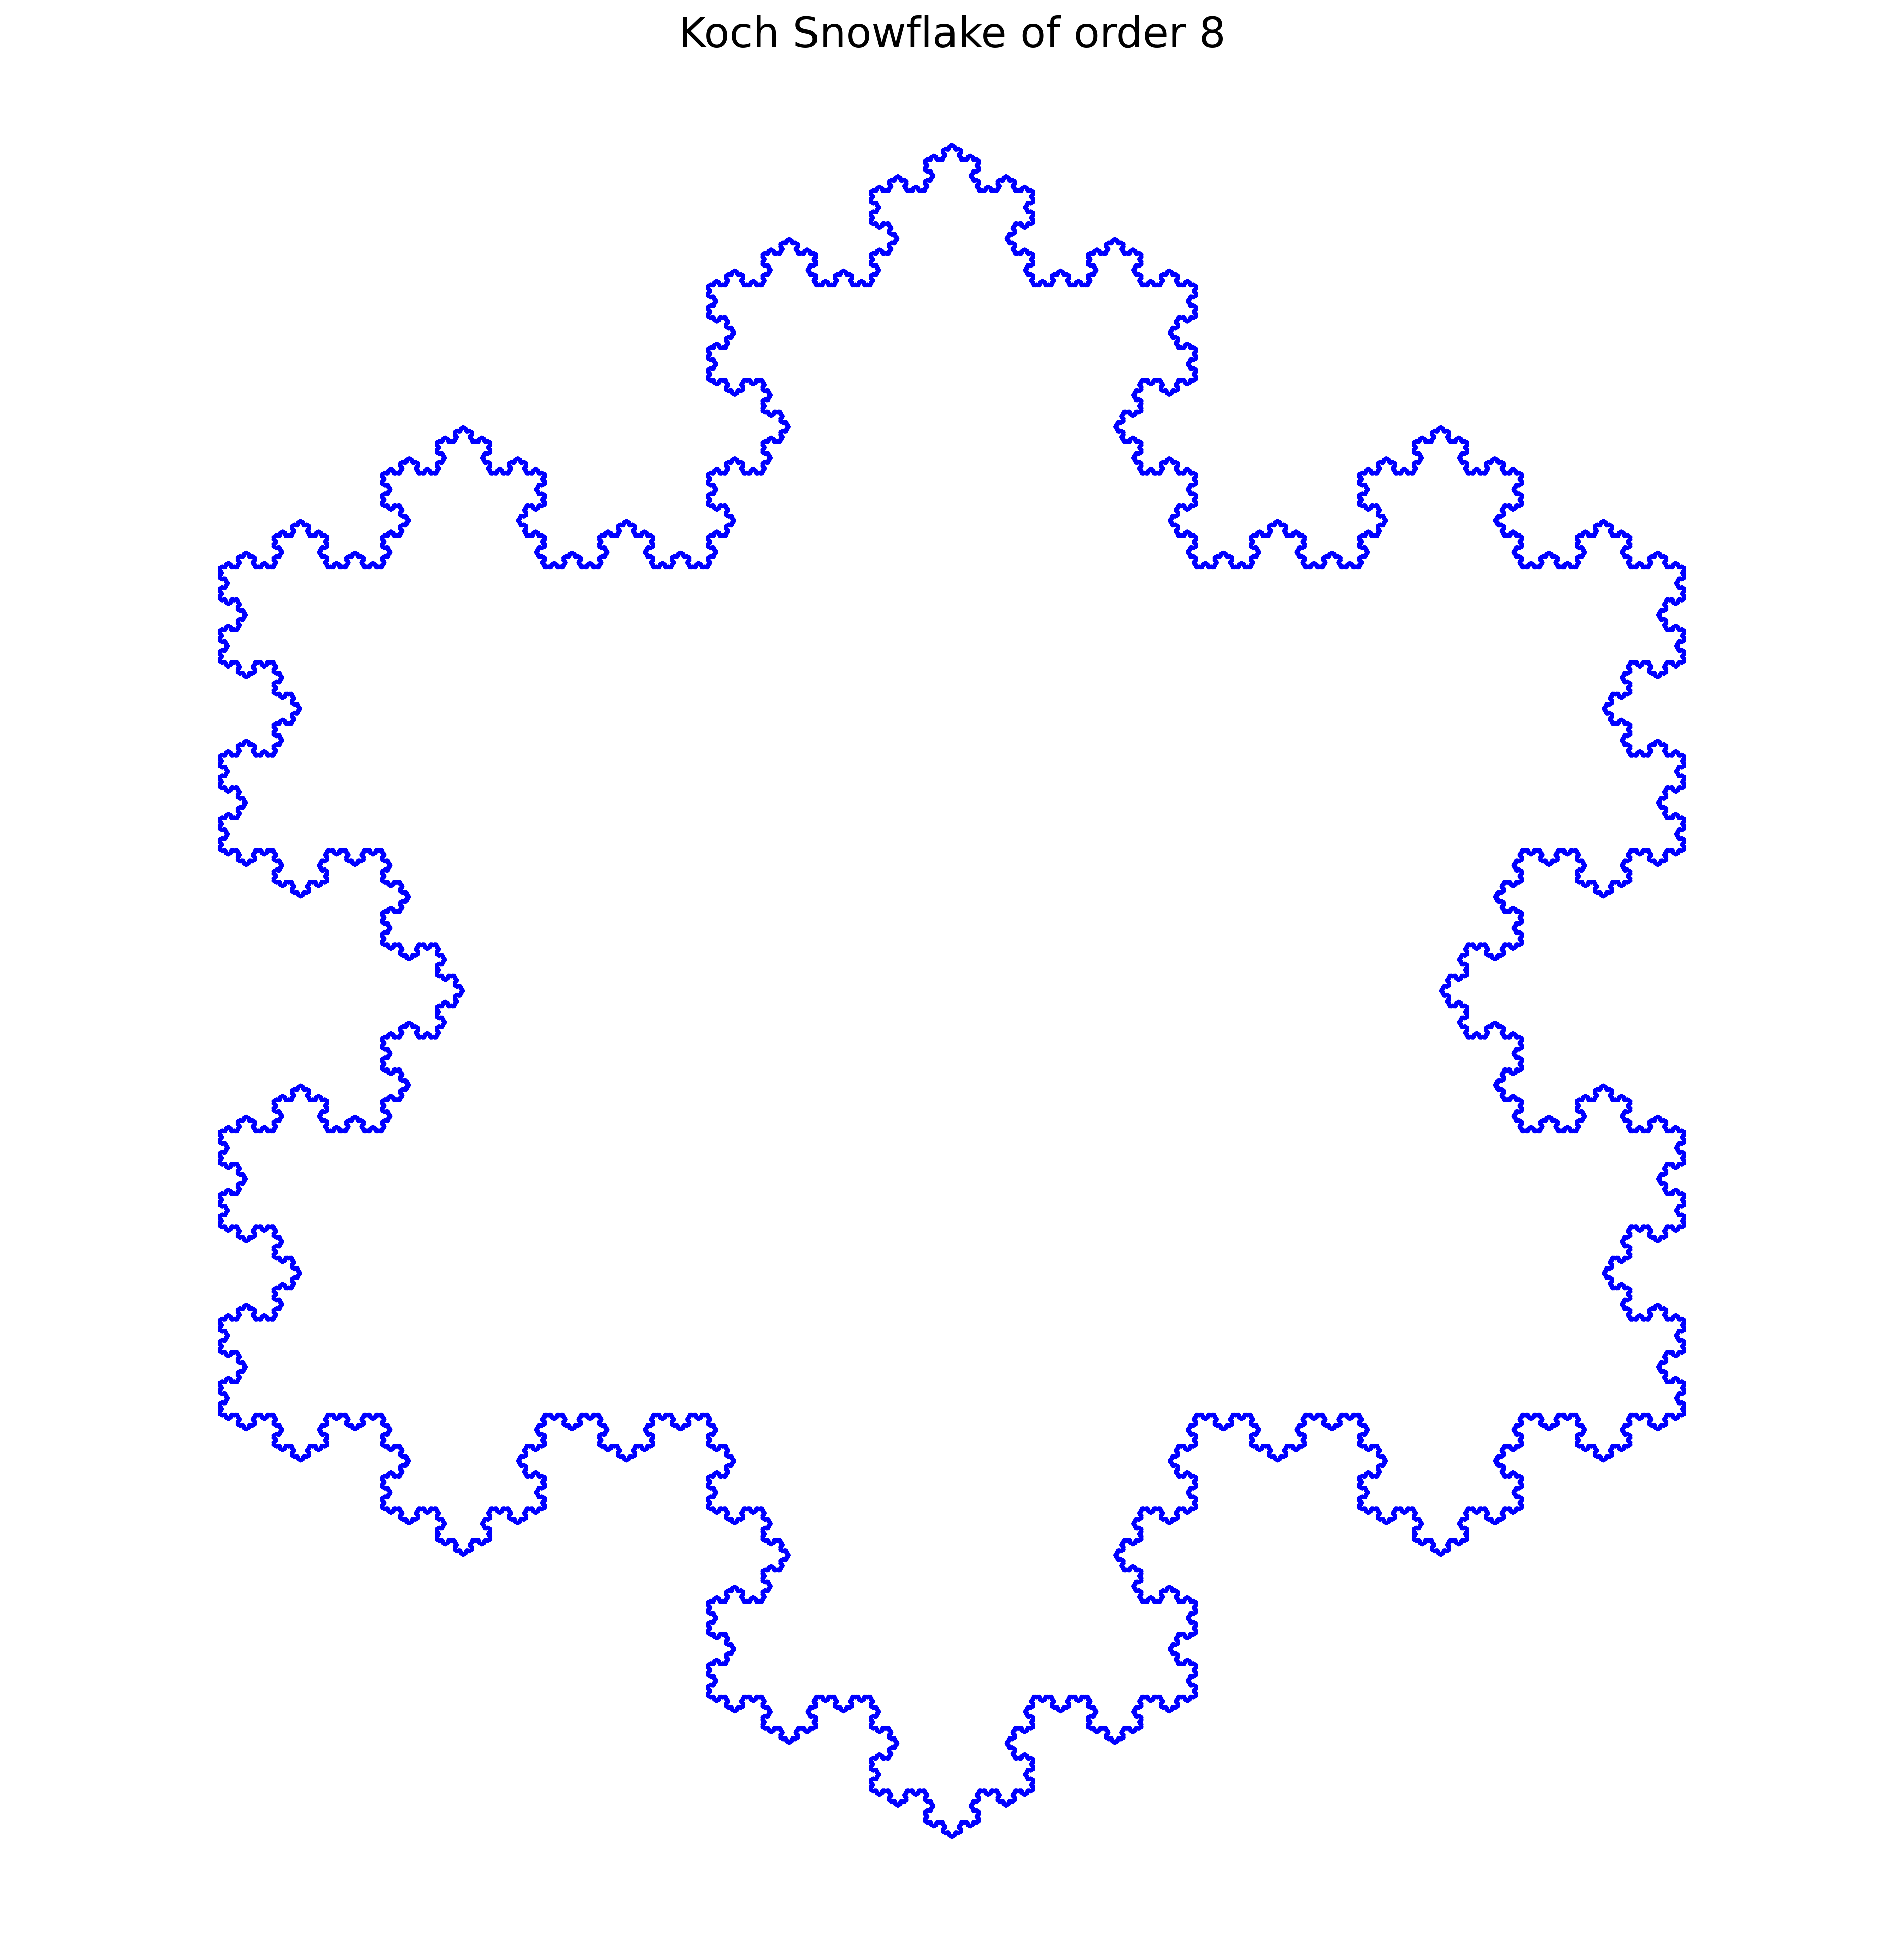

Saved Koch Snowflake of order 8 to output/koch_snowflake_order_8.png


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os

def koch_snowflake(order, scale=10):
    def _koch_snowflake_complex(order):
        if order == 0:
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors
            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

def plot_koch_snowflake(order, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    x, y = koch_snowflake(order)
    plt.figure(figsize=(16, 16), dpi=300)  # 画質を上げるためにdpiを300に設定
    plt.plot(x, y, 'b')
    plt.axis('equal')
    plt.axis('off')  # 軸を非表示にする
    plt.title(f"Koch Snowflake of order {order}", fontsize=20)
    output_path = os.path.join(output_dir, f"koch_snowflake_order_{order}.png")
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    print(f"Saved Koch Snowflake of order {order} to {output_path}")

# Koch Snowflakeのオーダーを設定（例：8）
plot_koch_snowflake(order=8)
